In [2]:
# Fine tuning for the initial 10 epochs
# !python fine_tune_resnet.py

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms, models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os
import zipfile
import urllib.request
from tqdm import tqdm
import sys 
import os

In [2]:
# Setting the paths
project_root = os.path.abspath('.')
if project_root not in sys.path:
    sys.path.append(project_root) 

train_data_path = os.path.join(project_root, "PlantCLEF2025_data/images_max_side_800")
saved_model_path = os.path.join(project_root, "resnet50")

# Importing related modules
from loading.data_loader import SinglePlantDataLoader
from resnet50 import resnet50

In [3]:
# Getting the training data ready
DATA_DIR = train_data_path

RESIZE_SIZE = 256
IMG_SIZE = 224 
BATCH_SIZE = 32
NUM_CLASSES = 7806  # As per the challenge overview
#NUM_WORKERS = os.cpu_count()  # Use all available CPU cores for loading
NUM_WORKERS = 4

data_splitter = SinglePlantDataLoader(
        data_dir=DATA_DIR,
        resize_size=RESIZE_SIZE,
        img_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        num_workers=NUM_WORKERS
    )

# Get the dataloaders
train_loader, val_loader, test_loader = data_splitter.get_dataloaders()


Loading data from: /sfs/weka/scratch/hl9h/PlantCLEF2025_data/images_max_side_800

Splitting dataset

Found 1408033 total images belonging to 7806 classes.


In [4]:
# Initialize Configuations for Fine Tuning/Training
NUM_CLASS = 7806
NUM_EPOCH = 10
LR = 0.0001
DEVICE = resnet50.device
print(f'Using device: {DEVICE}')

Using device: cuda


In [7]:
# Load the last fine-tuned parameters at epoch 10
# resnet50_finetune_ep10 = resnet50.get_resnet50_pretrained(num_classes=NUM_CLASS, fine_tune=True)
# state_dict = torch.load('resnet50_finetuned_plantCLEF_ep10.pth', weights_only=True)  # weights_only=True is recommended for security
# resnet50_finetune_ep10.load_state_dict(state_dict)


In [8]:
# Fine tuning for another 10 epochs (ep10-ep20)
# try:
#     print("\nFine-tuning ResNet50 ...")
    
#     num_params, trainable_params = resnet50.count_parameters(resnet50_finetune_ep10)
#     model_size = resnet50.get_model_size_mb(resnet50_finetune_ep10)
#     print(f"Total parameters: {num_params:,d}")
#     print(f"Trainable parameters: {trainable_params:,d}")
#     print(f"Model size: {model_size:.2f} MB")
    
#     finetune_history = resnet50.train_model(resnet50_finetune_ep10, 
#                                    train_loader, 
#                                    val_loader,
#                                    num_epochs=NUM_EPOCH, 
#                                    lr=LR)
    
#     #resnet50.plot_training_history(finetune_history, title="Fine Tuning History")
#     results_df = pd.DataFrame(finetune_history)
#     results_df.to_csv(f'{saved_model_path}/finetune_history.csv', index=False)
#     print(f"\nTraining {NUM_EPOCH} epochs finished! Fine tuning history saved to 'finetune_history.csv'")
    
# except Exception as e:
#     print(f"Error in Transfer Learning (Fine-tune): {e}")
#     finetune_history = {}

In [9]:
# Load the last fine-tuned parameters at epoch 20
# resnet50_finetune_ep20 = resnet50.get_resnet50_pretrained(num_classes=NUM_CLASS, fine_tune=True)
# state_dict = torch.load('resnet50_finetuned_plantCLEF_ep20.pth', weights_only=True)  # weights_only=True is recommended for security
# resnet50_finetune_ep20.load_state_dict(state_dict)

<All keys matched successfully>

In [ ]:
# Fine tuning for another 10 epochs (ep20-ep30)
# try:
#     print("\nFine-tuning ResNet50 ...")
    
#     num_params, trainable_params = resnet50.count_parameters(resnet50_finetune_ep20)
#     model_size = resnet50.get_model_size_mb(resnet50_finetune_ep20)
#     print(f"Total parameters: {num_params:,d}")
#     print(f"Trainable parameters: {trainable_params:,d}")
#     print(f"Model size: {model_size:.2f} MB")
    
#     finetune_history = resnet50.train_model(resnet50_finetune_ep20, 
#                                    train_loader, 
#                                    val_loader,
#                                    num_epochs=NUM_EPOCH, 
#                                    lr=LR)
    
#     #resnet50.plot_training_history(finetune_history, title="Fine Tuning History")
#     results_df = pd.DataFrame(finetune_history)
#     results_df.to_csv(f'{saved_model_path}/finetune_history.csv', index=False)
#     print(f"\nTraining {NUM_EPOCH} epochs finished! Fine tuning history saved to 'finetune_history.csv'")
    
# except Exception as e:
#     print(f"Error in Transfer Learning (Fine-tune): {e}")
#     finetune_history = {}


Fine-tuning ResNet50 ...
Total parameters: 39,502,526
Trainable parameters: 38,057,598
Model size: 150.89 MB
currentpath /sfs/weka/scratch/hl9h

Epoch 1/10
------------------------------


Evaluating: 100%|██████████| 4401/4401 [03:34<00:00, 20.54it/s]


Train Loss: 1.6914, Train Acc: 61.96%
Val Loss: 1.6537, Val Acc: 63.36%

Best model parameters updated at epoch 1!

Epoch 2/10
------------------------------


Evaluating: 100%|██████████| 4401/4401 [03:39<00:00, 20.03it/s]


Train Loss: 1.6345, Train Acc: 62.89%
Val Loss: 1.7953, Val Acc: 62.42%

Epoch 3/10
------------------------------


Evaluating: 100%|██████████| 4401/4401 [03:44<00:00, 19.63it/s]


Train Loss: 1.5822, Train Acc: 63.80%
Val Loss: 1.8293, Val Acc: 61.97%

Epoch 4/10
------------------------------


Evaluating: 100%|██████████| 4401/4401 [03:41<00:00, 19.85it/s]


Train Loss: 1.5353, Train Acc: 64.75%
Val Loss: 1.9671, Val Acc: 61.87%

Epoch 5/10
------------------------------


Evaluating: 100%|██████████| 4401/4401 [03:33<00:00, 20.64it/s]


Train Loss: 1.4959, Train Acc: 65.46%
Val Loss: 1.7508, Val Acc: 61.68%

Epoch 6/10
------------------------------


Evaluating: 100%|██████████| 4401/4401 [03:35<00:00, 20.46it/s]


Train Loss: 1.3072, Train Acc: 69.61%
Val Loss: 1.6045, Val Acc: 64.18%

Best model parameters updated at epoch 6!

Epoch 7/10
------------------------------


Evaluating: 100%|██████████| 4401/4401 [03:40<00:00, 19.99it/s]


Train Loss: 1.2601, Train Acc: 70.65%
Val Loss: 1.6730, Val Acc: 63.97%

Epoch 8/10
------------------------------


Evaluating: 100%|██████████| 4401/4401 [03:33<00:00, 20.63it/s]


Train Loss: 1.2371, Train Acc: 71.14%
Val Loss: 1.5905, Val Acc: 64.36%

Best model parameters updated at epoch 8!

Epoch 9/10
------------------------------


Training:   5%|▍         | 1622/35201 [01:21<29:45, 18.81it/s]

In [4]:
history = pd.read_csv('resnet50/finetune_history.csv')

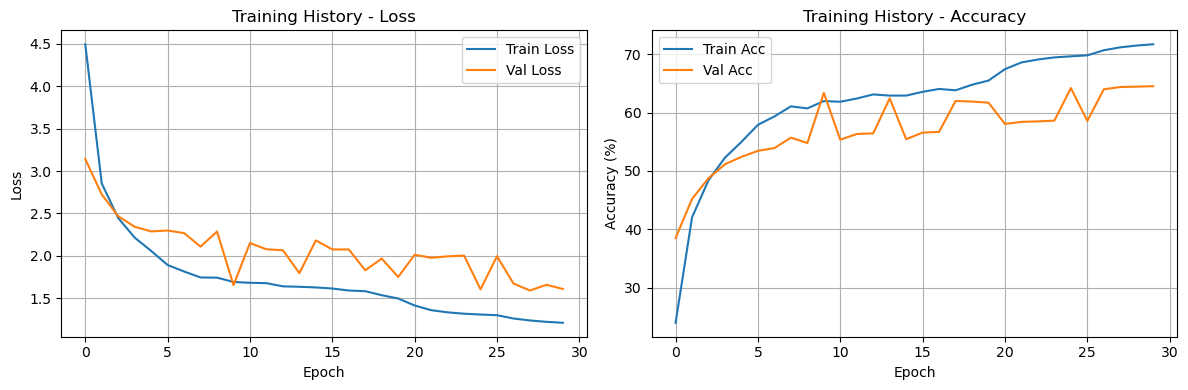

In [5]:
resnet50.plot_training_history(history)

In [5]:
# Load the final fine tuned ResNet50 parameters
resnet50_finetuned = resnet50.get_resnet50_pretrained(num_classes=NUM_CLASS, fine_tune=True)
state_dict = torch.load('resnet50/resnet50_finetuned_plantCLEF_ep30.pth', weights_only=True)  # weights_only=True is recommended for security
resnet50_finetuned.load_state_dict(state_dict)


<All keys matched successfully>

In [9]:
# Evaluate the Fine Tuned ResNet50 with the Unseen Test Set of the Training Data
criterion = nn.CrossEntropyLoss()
resnet50_finetuned.to(DEVICE)
test_loss, test_acc = resnet50.evaluate(resnet50_finetuned, test_loader, criterion, DEVICE)
print(f'Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%')

Evaluating: 100%|██████████| 4401/4401 [05:02<00:00, 14.57it/s]

Test Loss: 1.4286, Test Acc: 67.76%


In [11]:
# ============================================================================
# Data Loading and Preprocessing the UVA landmarks dataset
# ============================================================================

# def download_dataset():
#     """Download and extract the UVA landmarks dataset."""
#     url = "https://firebasestorage.googleapis.com/v0/b/uva-landmark-images.appspot.com/o/dataset.zip?alt=media&token=e1403951-30d6-42b8-ba4e-394af1a2ddb7"

#     if not os.path.exists('dataset'):
#         print("Downloading dataset...")
#         urllib.request.urlretrieve(url, 'dataset.zip')
#         print("Extracting dataset...")
#         with zipfile.ZipFile('dataset.zip', 'r') as zip_ref:
#             zip_ref.extractall('.')
#         os.remove('dataset.zip')
#     else:
#         print("Dataset already exists.")

# # Download dataset
# download_dataset()

# # Dataset parameters
# data_dir = "dataset/"
# batch_size = 32
# img_height = 150
# img_width = 150
# num_classes = 18

# # Class names for UVA landmarks
# class_names = ['AcademicalVillage', 'AldermanLibrary', 'AlumniHall', 'AquaticFitnessCenter',
#                'BavaroHall', 'BrooksHall', 'ClarkHall', 'MadisonHall', 'MinorHall',
#                'NewCabellHall', 'NewcombHall', 'OldCabellHall', 'OlssonHall', 'RiceHall',
#                'Rotunda', 'ScottStadium', 'ThorntonHall', 'UniversityChapel']

# # Data transforms
# train_transform = transforms.Compose([
#     transforms.Resize((img_height, img_width)),
#     transforms.RandomHorizontalFlip(),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
# ])

# val_transform = transforms.Compose([
#     transforms.Resize((img_height, img_width)),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
# ])

# # Create datasets
# full_dataset = datasets.ImageFolder(data_dir)
# train_size = int(0.8 * len(full_dataset))
# val_size = len(full_dataset) - train_size
# train_dataset, val_dataset = torch.utils.data.random_split(
#     full_dataset, [train_size, val_size],
#     generator=torch.Generator().manual_seed(42)
# )

# # Apply transforms
# train_dataset.dataset.transform = train_transform
# val_dataset.dataset.transform = val_transform

# # Create data loaders
# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
# val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# print(f"Training samples: {len(train_dataset)}")
# print(f"Validation samples: {len(val_dataset)}")